# Video Face Detection

In [45]:
import cv2
import json
import time
import PIL
import IPython
import imutils
import numpy as np
from io import BytesIO
from keras.models import model_from_json

In [6]:
with open('./output/model_sequential84.90231037139893.json','r') as f:
    model_json = json.load(f)
    
model = model_from_json(model_json)

model.load_weights('./output/model_sequential84.90231037139893.h5')

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [32]:
video = './input/video_prueba.mpg'

In [34]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()

    #flip image for natural viewing
    frame = cv2.flip(frame, 1)

    return frame

In [35]:
def array_to_image(a, fmt='jpeg'):
    #Create binary stream object
    f = BytesIO()

    #Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)

    return IPython.display.Image(data=f.getvalue())

In [37]:
MODEL ='model_sequential84.90231037139893'
MODEL_ROUTE = "./output/"
genre = ["man" ,"woman"]

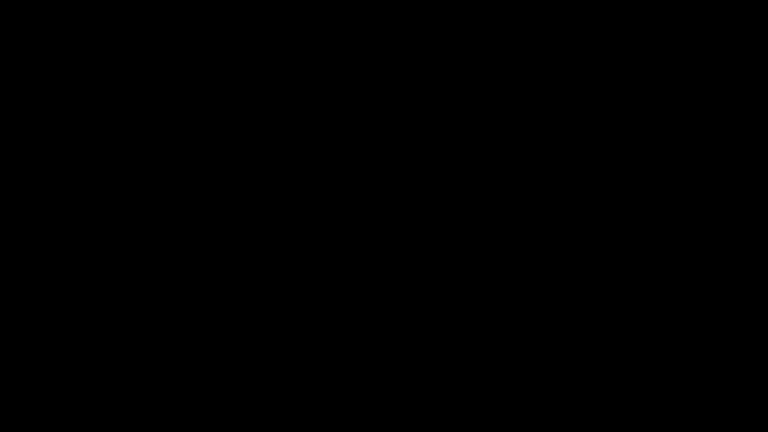

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 225 and the array at index 1 has size 300

In [46]:
cam = cv2.VideoCapture(video)

d = IPython.display.display("", display_id=1)
d2 = IPython.display.display("", display_id=2)

while True:
    try:
        t1 = time.time()
        frame = get_frame(cam)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        im = array_to_image(frame)

        d.update(im)

        t2 = time.time()

        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( IPython.display.HTML(s))
        
    except KeyboardInterrupt:
        print()
        cam.release()
        IPython.display.clear_output()
        print ("Stream stopped")
        break
    
    counter=125
    while cam.isOpened():
        counter+=1
        frame = cam.read()[1]
        frame = imutils.resize(frame, width=400)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces = face_cascade.detectMultiScale(gray, 1.25, 6)
        canvas = np.zeros((300, 300, 3), dtype="uint8") 
        frameClone = frame.copy()
    
        if len(faces) > 0:
            (fX, fY, fW, fH) = faces[0]
            roi = gray[fY:fY + fH, fX:fX + fW]
            roi = cv2.resize(roi, (60, 60))
            roi = roi/ 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0).reshape(np.expand_dims(roi,axis=0).shape[0], 60, 60, 3)
        
            cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),
                                        (250,128,114), 1)

            for (i, (genre, prob)) in enumerate(zip(genre, preds)):
                        
                        text = "{}: {:.2f}%".format(genre, prob * 100)
                        w = int(prob * 300)
                        cv2.rectangle(canvas, (7, (i * 35) + 5),
                        (w, (i * 35) + 35), (250,128,114), -1)
                        cv2.putText(canvas, text, (10, (i * 35) + 23),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.45,
                        (255,255,255), 2)
                        cv2.putText(frameClone, label, (fX, fY - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.45, (250,128,114), 2) 
            
    
        numpy_horizontal_concat = np.concatenate((frameClone, canvas), axis=1)
        cv2.imshow('Genre', numpy_horizontal_concat)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
        counttoclose+=1
        print(counttoclose)
        if counttoclose == 300:
            cap.release()
    cam.release()
    cv2.destroyAllWindows()
    Print('works!')
